In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np

In [59]:
def get_classifier_records(nc, cls_type, ds, total_epoch):
    
    if cls_type == "key":
        f_name = f"{ds}_{nc}/{cls_type}_cls_{nc}_{total_epoch}e_records_corr.csv"
    
    else:
        f_name = f"{ds}_{nc}/{cls_type}_cls_{nc}_{total_epoch}e_records.csv"
    
    df = pd.read_csv(f_name)
    
    return {"epochs":list(df.iloc[:, 0]),
            "train_losses" : list(df["train_losses"]),
            "valid_losses" : list(df["valid_losses"]),
            "valid_accuracies" : list(df["valid_accuracies"])
           }

def get_lm_records(nc, cls_type, ds):

    if cls_type == "key": cpnum = 23000
    elif cls_type == "genre": cpnum = 2000
    
    epochs = []
    log_steps = []
    train_losses = []
    eval_losses = []
    
    f_name = f"{ds}_{nc}/{ds}_{nc}_bert_model/checkpoint-{cpnum}/trainer_state.json"
    
    f = open(f_name, "r")
    logs = json.load(f)["log_history"]

    for log in logs:
        epochs.append(log["epoch"])
        log_steps.append(log["step"])

        if "loss" in log.keys():
            train_losses.append(log["loss"])

        if "eval_loss" in log.keys():
            eval_losses.append(log["eval_loss"])
            
    return {"epochs":epochs,
            "log_steps":log_steps,
            "train_losses":list(train_losses), 
            "eval_losses":list(eval_losses)
           }

def plot(cls_records, lm_records):
    
    # plot classifier records - train vs. valid losses - train vs. valid accuracies
    
    cls_plot1 = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=2)
    cls_plot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3, colspan=2)
    
    cls_plot1.plot(cls_records["epochs"], cls_records["train_losses"], 'm')
    cls_plot1.plot(cls_records["epochs"], cls_records["valid_losses"], 'y')
    cls_plot1.set_title("cls train loss vs. valid loss")
    
    cls_plot2.plot(cls_records["epochs"], cls_records["valid_accuracies"], 'y')
    cls_plot2.set_title("cls valid accuracies")
    
    plt.show()
    
    plt.plot(np.unique(lm_records["log_steps"]), lm_records["train_losses"], 'm')
    plt.plot(np.unique(lm_records["log_steps"]), lm_records["eval_losses"], 'y')
    plt.title("LM train vs. valid loss")
    
    plt.show()

## gtzan

In [51]:
cls_type = "genre"
ds = "gtzan"
epochs = 50

### 128 clusters

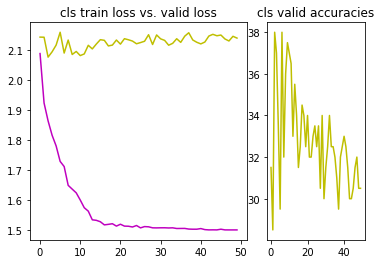

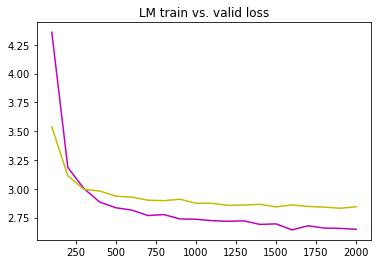

In [52]:
nc = "128c"

lm_records = get_lm_records(nc, cls_type, ds)
classifier_records = get_classifier_records(nc, cls_type, ds, epochs)

plot(classifier_records, lm_records)

### 256 clusters

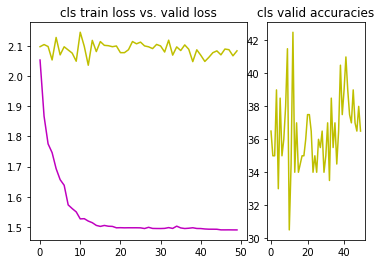

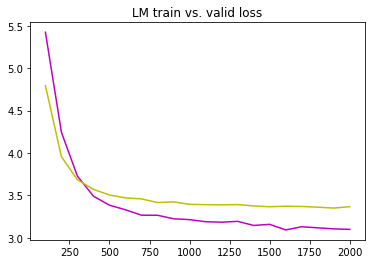

In [53]:
nc = "256c"

lm_records = get_lm_records(nc, cls_type, ds)
classifier_records = get_classifier_records(nc, cls_type, ds, epochs)

plot(classifier_records, lm_records)

### 512 clusters

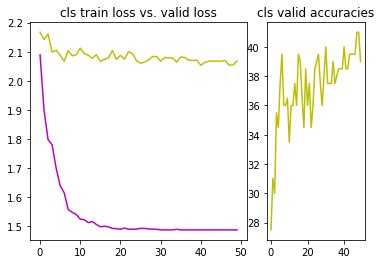

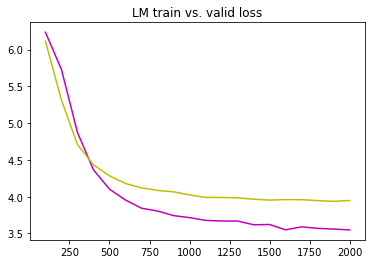

In [54]:
nc = "512c"

lm_records = get_lm_records(nc, cls_type, ds)
classifier_records = get_classifier_records(nc, cls_type, ds, epochs)

plot(classifier_records, lm_records)

### 1024 clusters

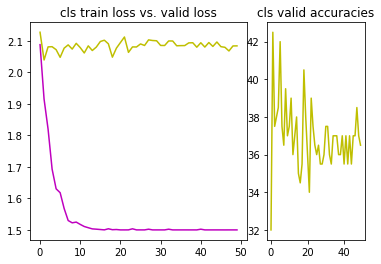

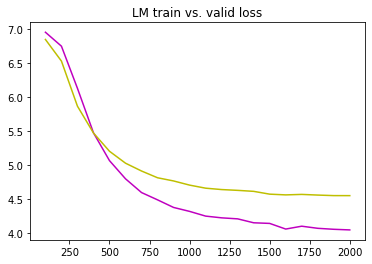

In [55]:
nc = "1024c"

lm_records = get_lm_records(nc, cls_type, ds)
classifier_records = get_classifier_records(nc, cls_type, ds, epochs)

plot(classifier_records, lm_records)

## giant steps

In [60]:
cls_type = "key"
ds = "gs"
epochs = 50

### 128 clusters

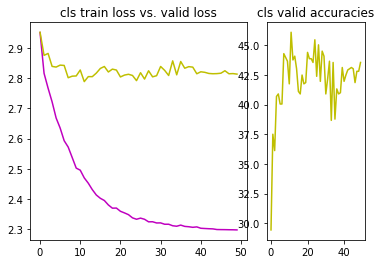

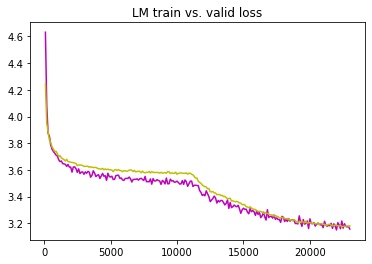

In [61]:
nc = "128c"

lm_records = get_lm_records(nc, cls_type, ds)
classifier_records = get_classifier_records(nc, cls_type, ds, epochs)

plot(classifier_records, lm_records)

### 256 clusters

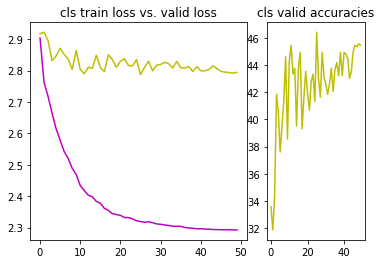

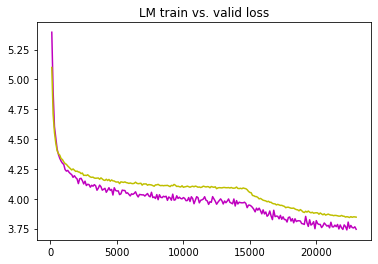

In [62]:
nc = "256c"

lm_records = get_lm_records(nc, cls_type, ds)
classifier_records = get_classifier_records(nc, cls_type, ds, epochs)

plot(classifier_records, lm_records)

### 512 clusters

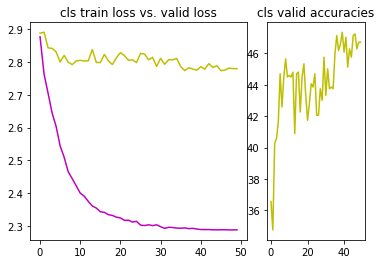

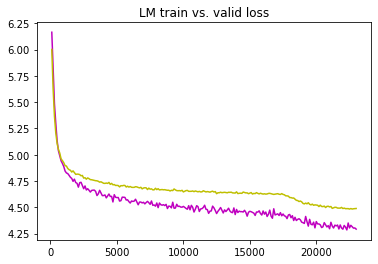

In [63]:
nc = "512c"

lm_records = get_lm_records(nc, cls_type, ds)
classifier_records = get_classifier_records(nc, cls_type, ds, epochs)

plot(classifier_records, lm_records)

### 1024 clusters

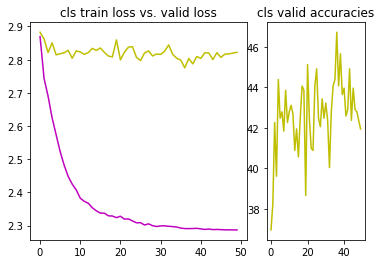

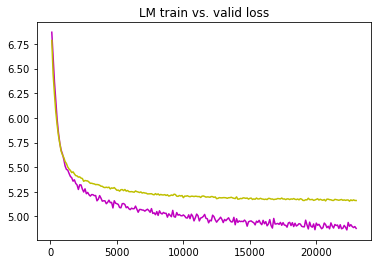

In [64]:
nc = "1024c"

lm_records = get_lm_records(nc, cls_type, ds)
classifier_records = get_classifier_records(nc, cls_type, ds, epochs)

plot(classifier_records, lm_records)